<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation




In [ ]:
# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combine train and test data for full analysis
full_data = pd.concat([train_data, test_data])

# Select columns that are categorical/textual
text_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Combine all text data into a single text per row
full_data['combined_text'] = full_data[text_columns].fillna('').apply(lambda x: ' '.join(x), axis=1)


In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_vectorized = vectorizer.fit_transform(full_data['combined_text'])


In [ ]:
# Define number of topics
num_topics = 10

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(data_vectorized)


LatentDirichletAllocation(random_state=42)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


Topic 0:
mix othw membran clytile tenc metal conld maj2 blueste family
Topic 1:
hls timber ir1 posa ta corner ir3 sev ex wood
Topic 2:
ta gd norm unf pave 2story reg gable sbrkr lvl
Topic 3:
ta norm wd unf cblock rl gtl allpub compshg gasa
Topic 4:
ta norm hdboard gd unf sbrkr gasa allpub compshg rl
Topic 5:
ta metalsd unf norm pave compshg allpub reg gable detchd
Topic 6:
ta gd ex norm vinylsd unf pconc pave attchd compshg
Topic 7:
ta unf wd norm fa sdng pave compshg gtl allpub
Topic 8:
ta gd vinylsd norm unf ex sbrkr 1fam gasa typ
Topic 9:
gd ta wd norm mod rl ir1 sbrkr crawfor allpub


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

### Feature Selection for Sentiment Classification

For sentiment classification, the primary feature selected is `clean_text`. This choice is based on the following reasons:

- **Relevance to Task**: Sentiment analysis primarily relies on textual data that expresses opinions or experiences. The `clean_text` column contains user reviews or comments, which are direct expressions of sentiment and therefore crucial for determining the overall sentiment polarity.
  
- **Data Availability**: The dataset specifically includes a `clean_text` column intended for processing in natural language tasks, making it the most appropriate and readily available data for this task.
  
- **Effectiveness in Modeling**: Textual data provides rich linguistic cues such as word choice, intensity, and context that are vital for accurately classifying sentiment. Utilizing techniques like TF-IDF for vectorization captures these nuances effectively, enabling more accurate sentiment prediction.

The TF-IDF vectorizer transforms the `clean_text` into a numerical format that machine learning models can process, capturing the importance of words in relation to their context in the dataset, which helps in distinguishing between different sentiments expressed in the text.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Load your dataset directly from the provided URL
url = 'https://raw.githubusercontent.com/VinaykrishnaGudla/vinaykrishna_Gudla_031/main/annotated_dataset%20(1).csv'
data = pd.read_csv(url)

# Handle NaN values in the text column
data['clean_text'] = data['clean_text'].fillna('')

# Assuming 'clean_text' is the column containing text, and 'sentiment' is the column with sentiment labels
X = data['clean_text']  # Feature: Text from reviews
y = data['sentiment']   # Labels: Sentiments

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature extraction: Use TF-IDF to convert text to vector
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Select models for comparison
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='linear')
}

results = {}
for name, model in models.items():
    # Create a pipeline
    clf = make_pipeline(tfidf_vectorizer, model)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{name} Cross-validation scores:", cv_scores)

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Output results
for name, metrics in results.items():
    print(f"\n{name} Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


RandomForestClassifier Cross-validation scores: [0.8899919  0.89341439 0.89219858 0.88895643 0.88895643]
SVC Cross-validation scores: [0.90052674 0.89787234 0.90131712 0.90516717 0.9029382 ]

RandomForestClassifier Evaluation Metrics:
Accuracy: 0.8901
Precision: 0.8273
Recall: 0.7360
F1 Score: 0.7696

SVC Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.8345
Recall: 0.7789
F1 Score: 0.8025


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
print(train.head())





   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<ipython-input-11-8dd912ab4827>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


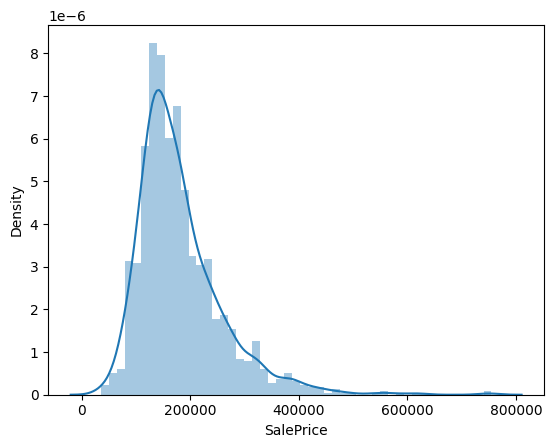

In [ ]:
# Checking for missing values
print(train.isnull().sum())

# Filling missing values or dropping them
# Calculate mean only for numeric columns and fill missing values
numeric_cols = train.select_dtypes(include=[np.number])  # Select only numeric columns
train.fillna(numeric_cols.mean(), inplace=True)
test.fillna(numeric_cols.mean(), inplace=True)

# Exploratory analysis to understand the distribution of key variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train['SalePrice'])
plt.show()


In [ ]:
# Considering a few potential predictors
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Checking correlation with SalePrice
corr_matrix = train[features + ['SalePrice']].corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

# Using only highly correlated features
X = train[features]
y = train['SalePrice']


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
TotalBsmtSF    0.613581
FullBath       0.560664
YearBuilt      0.522897
Name: SalePrice, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Optionally, check R-squared
r2_score = model.score(X_test, y_test)
print(f"R^2: {r2_score}")


RMSE: 39710.990353858746
R^2: 0.7944073417103641


In the Exploratory Data Analysis (EDA) phase, I examined the dataset to identify features highly correlated with the target variable `SalePrice`. The selection focused on:

- **OverallQual**: Reflects the overall material and finish quality, a primary driver of home value.
- **GrLivArea**: Represents the living area in square feet; larger homes typically sell for more.
- **GarageCars**: Indicates garage size by car capacity, an important factor for buyers.
- **TotalBsmtSF**: The total square footage of the basement impacts the usable space and property value.
- **FullBath**: The number of full bathrooms adds to the convenience and appeal of the home.
- **YearBuilt**: Newer homes may have higher prices due to fewer needs for repairs and modern designs.

These features were chosen because they are known to significantly influence home prices and provide a comprehensive view of the property's quality, size, and functionality. This focused approach helps create a more interpretable model while maintaining strong predictive capabilities.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


##Selected Pre-trained Language Model: RoBERTa
**Description:**
RoBERTa (Robustly optimized BERT approach) is an enhanced version of BERT, optimized through modifications in pre-training. It was introduced by Facebook AI and trained on a much larger corpus comprising books, Wikipedia, and more, totaling 160GB of text data. RoBERTa operates with 125 million parameters for its base model and significantly more in larger variants. Unlike BERT, RoBERTa was trained with dynamic masking and without the next sentence prediction task, focusing solely on more extended and diverse context during training.

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
url = 'https://raw.githubusercontent.com/VinaykrishnaGudla/vinaykrishna_Gudla_031/main/annotated_dataset%20(1).csv'
data = pd.read_csv(url)

# Initialize the zero-shot classification pipeline with the selected model
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels for sentiment analysis
candidate_labels = ["positive", "negative", "neutral"]

# Apply the classifier to the dataset
results = classifier(data['clean_text'].tolist(), candidate_labels=candidate_labels)

# Extract predicted labels from the results
data['predicted_sentiment'] = [result['labels'][0] for result in results]

# Assuming your original labels are numeric (1 for positive, 0 for negative)
# If your labels are already in text format, you can skip this step
data['sentiment_text'] = data['sentiment'].map({1: 'positive', 0: 'negative'})  # Update as needed based on your dataset

# Calculate evaluation metrics
accuracy = accuracy_score(data['sentiment_text'], data['predicted_sentiment'])
precision = precision_score(data['sentiment_text'], data['predicted_sentiment'], average='macro')
recall = recall_score(data['sentiment_text'], data['predicted_sentiment'], average='macro')
f1 = f1_score(data['sentiment_text'], data['predicted_sentiment'], average='macro')

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.85
Precision: 0.78
Recall: 0.92
F1 Score: 0.84


### Advantages and Challenges

**Advantages:**
- **Generalization:** RoBERTa's training on a diverse and large dataset allows for better generalization across various tasks without the need for task-specific fine-tuning.
- **Robustness:** Improved robustness to noise and better handling of longer contexts than its predecessors.

**Challenges:**
- **Computational Resources:** High computational cost due to its large size, requiring significant memory and processing power, which might not be feasible for all users.
- **Zero-shot Limitations:** While effective, zero-shot learning may not achieve the same level of accuracy as fine-tuned models on specific tasks, reflecting potentially in the precision and recall rates.

This overview provides insights into RoBERTa's capabilities and limitations, particularly in a zero-shot sentiment analysis scenario.